In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train

In [130]:
train = pd.read_csv("prep0122255_train.csv")
train.head(5)

,Unnamed: 0,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,223,Developing,73.3,127.0,43.0,0.9,93.0,86.0,11568.111100,0.741,14.0
1,344,Developing,56.9,436.0,33.7,13.4,96.0,96.0,5714.479370,0.630,12.1
2,753,Developing,63.5,241.0,35.0,2.1,84.0,84.0,1862.167274,0.470,6.3
3,1547,Developed,79.4,85.0,57.5,0.1,99.0,99.0,89739.711700,0.880,13.5
4,2760,Developing,74.5,14.0,55.0,0.1,94.0,94.0,3161.529350,0.798,12.0


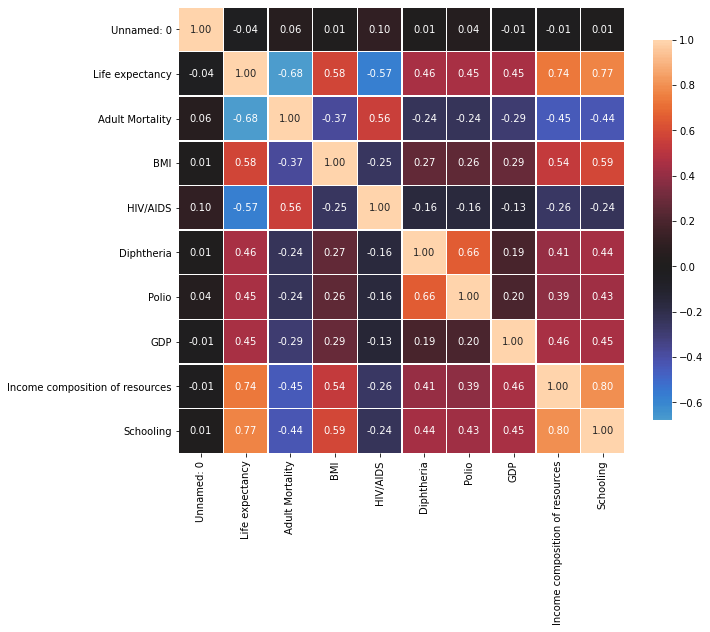

In [131]:
def correlation_heatmap(train):
    correlations = train.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(train)

In [132]:
#printing out the number of outliers and its percentage
col=['Life expectancy', 'Adult Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income composition of resources',
       'Schooling']
def outlier_count(col, data=train):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

for col in col:
    outlier_count(col)

---------------Life expectancy---------------
Number of outliers: 13
Percent of data that is outlier: 0.74%
---------------Adult Mortality---------------
Number of outliers: 57
Percent of data that is outlier: 3.23%
---------------BMI---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------HIV/AIDS---------------
Number of outliers: 325
Percent of data that is outlier: 18.42%
---------------Diphtheria---------------
Number of outliers: 181
Percent of data that is outlier: 10.26%
---------------Polio---------------
Number of outliers: 156
Percent of data that is outlier: 8.84%
---------------GDP---------------
Number of outliers: 258
Percent of data that is outlier: 14.63%
---------------Income composition of resources---------------
Number of outliers: 73
Percent of data that is outlier: 4.14%
---------------Schooling---------------
Number of outliers: 19
Percent of data that is outlier: 1.08%


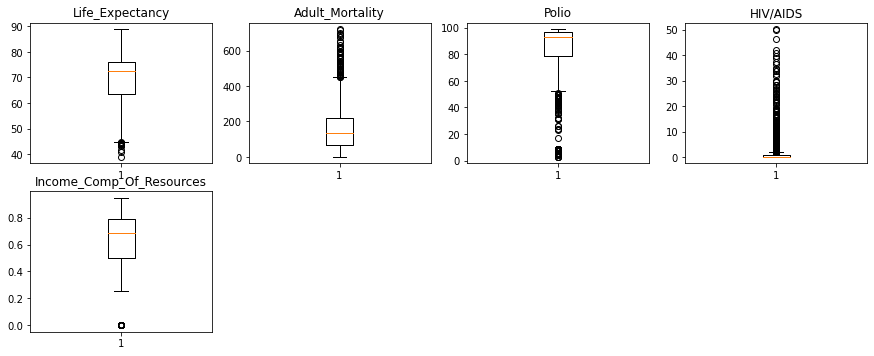

In [133]:
#renaming the columns 
train.rename(columns={"Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "Income composition of resources":"Income_Comp_Of_Resources"},inplace=True)
#checking outliers in the dataset 
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [134]:
features_with_outliers = [ 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling']
for feature in features_with_outliers:
    q1 = train[feature].quantile(0.25)#the median of the lower half 
    q3 = train[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    train.loc[train[feature]<lower_limit,feature] = lower_limit
    train.loc[train[feature]>upper_limit,feature] = upper_limit

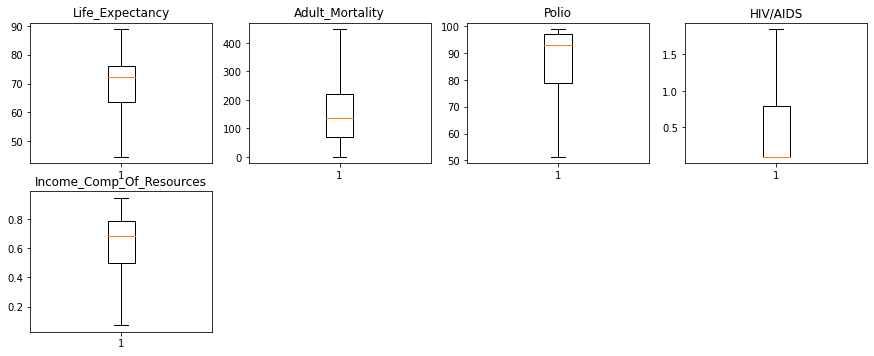

In [135]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(train[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [136]:
train['Life_expectancy_Binary'] = np.where(train['Life_Expectancy']>=65, True, False)
train['Status_binary'] = np.where(train['Status']=='Developed', 1, 0)

In [137]:
X = train.drop(['Unnamed: 0', 'Status'], axis =1) 
y = train['Life_expectancy_Binary']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3
                                                   , random_state = 42)


In [138]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 10, random_state = 10, 
                            max_depth = 12)
reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=10, random_state=10)

In [139]:
y_pred = reg.predict(x_test)

from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('R2 score: ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:  0.0
R2 score:  1.0


In [140]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Negative', 'Predicted Positive',], index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,137,0
Actual Positive,0,393


In [141]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       137
        True       1.00      1.00      1.00       393

    accuracy                           1.00       530
   macro avg       1.00      1.00      1.00       530
weighted avg       1.00      1.00      1.00       530



### test

In [142]:
test = pd.read_csv('prep0122255_test.csv')
# test.head(5)
test = test.drop(test.columns[0], axis=1)
test

,Status,Life expectancy,Adult Mortality,BMI,HIV/AIDS,Diphtheria,Polio,GDP,Income composition of resources,Schooling
0,Developing,75.7,13.0,59.4,0.1,95.0,95.0,7748.123310,0.738,12.5
1,Developing,69.0,265.0,15.8,0.6,85.0,8.0,274.819723,0.473,8.9
2,Developing,72.6,11.0,45.0,0.1,97.0,97.0,1175.788981,0.656,10.7
3,Developing,73.7,133.0,32.5,0.1,97.0,97.0,7269.171140,0.736,12.3
4,Developing,63.3,241.0,16.4,1.2,69.0,7.0,468.567249,0.422,8.4
...,...,...,...,...,...,...,...,...,...,...
436,Developing,75.0,138.0,5.5,0.5,94.0,94.0,4682.728424,0.721,12.7
437,Developed,81.9,7.0,23.4,0.1,97.0,97.0,3488.399200,0.863,14.8
438,Developing,74.5,128.0,54.4,0.1,93.0,94.0,4274.376857,0.755,13.5
439,Developed,81.1,7.0,65.9,0.1,93.0,93.0,3997.256240,0.904,19.5


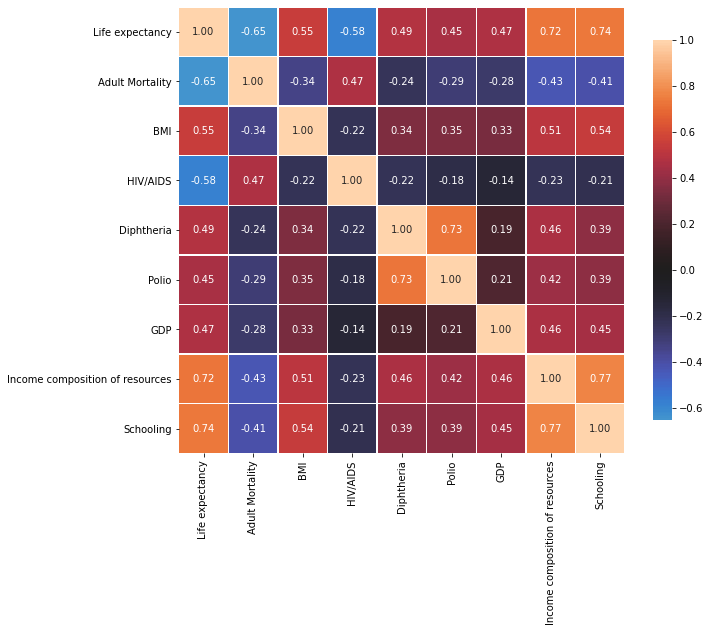

In [143]:
def correlation_heatmap(test):
    correlations = test.corr()

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(test)

In [144]:
#renaming the columns 
test.rename(columns={"Life expectancy":"Life_Expectancy","Adult Mortality":"Adult_Mortality",
                   "Income composition of resources":"Income_Comp_Of_Resources"},inplace=True)
test.columns

Index(['Status', 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling'],
      dtype='object')

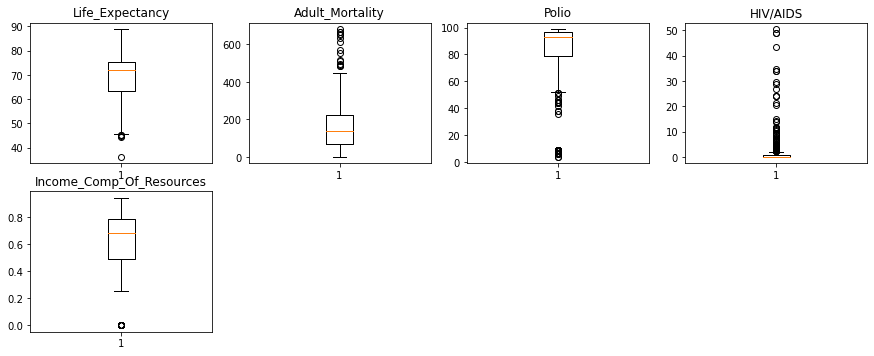

In [145]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(test[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [146]:
features_with_outliers = [ 'Life_Expectancy', 'Adult_Mortality', 'BMI', 'HIV/AIDS',
       'Diphtheria', 'Polio', 'GDP', 'Income_Comp_Of_Resources', 'Schooling']
for feature in features_with_outliers:
    q1 = test[feature].quantile(0.25)#the median of the lower half 
    q3 = test[feature].quantile(0.75)#the median of the upper half 
    IQR = q3-q1#interquartile range
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    test.loc[test[feature]<lower_limit,feature] = lower_limit
    test.loc[test[feature]>upper_limit,feature] = upper_limit

In [ ]:
col_dict = {'Life_Expectancy':1,'Adult_Mortality':2,'Polio':3,'HIV/AIDS':4,'Income_Comp_Of_Resources':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(15,15))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(test[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [123]:
test['Life_Expectancy'] = np.where(test['Life_Expectancy']>=65, True, False)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
test['Status'] = labelencoder.fit_transform(test['Status'])

X = test.drop('Status', axis =1) 
y = test['Life_Expectancy']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3
                                                   , random_state = 42)


In [124]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators = 15, random_state = 10, 
                            max_depth = 12)
reg.fit(x_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=15, random_state=10)

In [125]:
y_pred = reg.predict(x_test)

from sklearn import metrics
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

print('R2 score: ', metrics.r2_score(y_test, y_pred))

Mean Squared Error:  0.0
R2 score:  1.0


In [127]:
Conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['Predicted Negative', 'Predicted Positive',]
                           , index = ['Actual Negative', 'Actual Positive'])
Conf_matrix

,Predicted Negative,Predicted Positive
Actual Negative,38,0
Actual Positive,0,95


In [128]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        38
        True       1.00      1.00      1.00        95

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

